In [248]:
import pandas as pd
import numpy as np

# Exercises

## Temperatures

In [4]:
# set temps data to a dataframe
from vega_datasets import data
temps = data.sf_temps()
temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
# make sure date is datetype
temps.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [6]:
# set index to the date
temps = temps.set_index('date').sort_index()
temps

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

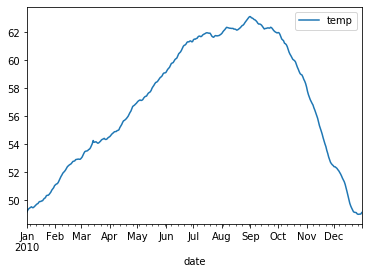

In [12]:
temps.resample('d').mean().plot()

2. Write the code necessary to visualize the minimum temperature over time.

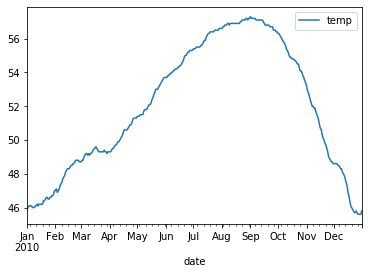

In [15]:
temps.resample('d').min().plot()

3. Write the code necessary to visualize the maximum temperature over time.

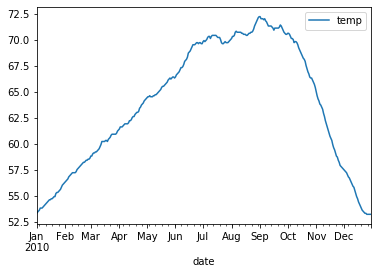

In [16]:
temps.resample('d').max().plot()

4. Which month is the coldest, on average?

In [32]:
temps.resample('m').mean().sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98414


5. Which month has the highest average temperature?

In [33]:
temps.resample('m').mean().sort_values(by='temp').tail(1)

,temp
date,
2010-09-30,62.487083


6. Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [89]:
# temperature range by day
temp_var = temps.resample('d').max() - temps.resample('d').min()
# average temperature range by month
temp_var_month = temp_var.resample('m').mean()
# highest temperature range variablility by month
temp_var_month.sort_values(by='temp').tail(1)

,temp
date,
2010-09-30,14.403333


7. **Bonus**: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

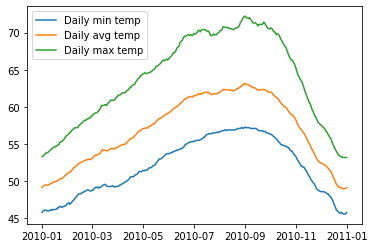

In [61]:
import matplotlib.pyplot as plt

plt.plot(temps.resample('d').min(), label='Daily min temp')
plt.plot(temps.resample('d').mean(), label='Daily avg temp')
plt.plot(temps.resample('d').max(), label='Daily max temp')
plt.legend()

---

## Seattle Weather

In [62]:
# set seattle weather data to a dataframe
from vega_datasets import data
weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [63]:
# make sure date is datetype
weather.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [64]:
# set index to the date
weather = weather.set_index('date').sort_index()
weather

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?

In [91]:
weather.resample('m').precipitation.sum().sort_values().tail(1)

date
2015-12-31    284.5
Name: precipitation, dtype: float64

- Visualize the amount of monthly precipitation over time.

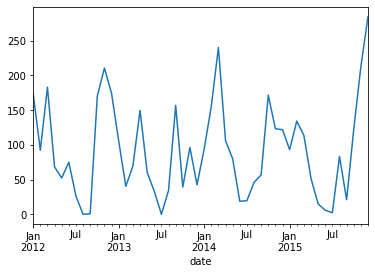

In [92]:
weather.resample('m').precipitation.sum().plot()

- Visualize the amount of wind over time. Choose a time interval you think is appropriate.

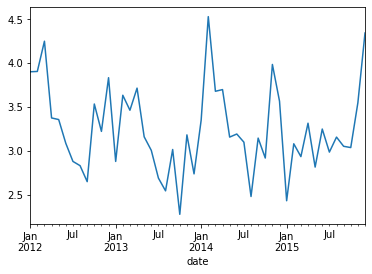

In [97]:
weather.resample('m').wind.mean().plot()

- Which year-month combination is the windiest?

In [101]:
weather.resample('m').wind.mean().sort_values().tail(1)

date
2014-02-28    4.528571
Name: wind, dtype: float64

- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [122]:
weather[weather.weather == 'sun'].resample('y').size().sort_values().tail(1)

date
2014-12-31    211
dtype: int64

- In which month does it rain the most?

In [130]:
weather.resample('m').precipitation.sum().sort_values().tail(1)

date
2015-12-31    284.5
Name: precipitation, dtype: float64

- Which month has the most number of days with a non-zero amount of precipitation?

In [139]:
weather[weather.precipitation != 0].resample('m').size().sort_values().tail(1)

date
2012-12-31    27
dtype: int64

---
## Flights 2000

In [240]:
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [241]:
flights.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

In [242]:
flights.shape

(20000, 5)

In [243]:
flights = flights.set_index('date').sort_index()
flights

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,-5,318,FLL,JAX
2001-03-31 21:05:00,-1,451,MCI,IND


- Convert any negative delays to 0.

In [244]:
flights.loc[flights.delay < 0, 'delay'] = 0

In [245]:
flights

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND


- Which hour of the day has the highest average delay?

In [334]:
flights.resample('H').delay.mean().sort_values(ascending=False).head(1)

date
2001-02-23 03:00:00    360.0
Name: delay, dtype: float64

- Does the day of the week make a difference in the delay amount?

In [254]:
flights['date'] = flights.index

In [262]:
flights['weekday'] = flights.date.dt.day_name()

In [269]:
flights.groupby('weekday').delay.mean().sort_values(ascending=False)

weekday
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

- Does the month make a difference in the delay amount?

In [274]:
flights.resample('m').delay.mean()

date
2001-01-31    11.301592
2001-02-28    12.306106
2001-03-31     9.875287
Freq: M, Name: delay, dtype: float64

# Bonus

## Iowa electricity

In [280]:
from vega_datasets import data
iowa = data.iowa_electricity()
iowa.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [281]:
iowa.dtypes

year              datetime64[ns]
source                    object
net_generation             int64
dtype: object

In [282]:
iowa.shape

(51, 3)

In [283]:
iowa = iowa.set_index('year').sort_index()

In [286]:
iowa

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574
2002-01-01,Renewables,1963
2003-01-01,Fossil Fuels,36234
2003-01-01,Nuclear Energy,3988
2003-01-01,Renewables,1885


- For each row, calculate the percentage of the year's total that energy source provided.

In [344]:
iowa.resample('y').sum() 

,net_generation
year,
2001-12-31,40651
2002-12-31,42528
2003-12-31,42107
2004-12-31,43236
2005-12-31,44145
2006-12-31,45473
2007-12-31,49778
2008-12-31,53086
2009-12-31,51859


- Lineplot of generation over time, color by source

Text(0.5, 1.0, 'Energy Generation Over Time')

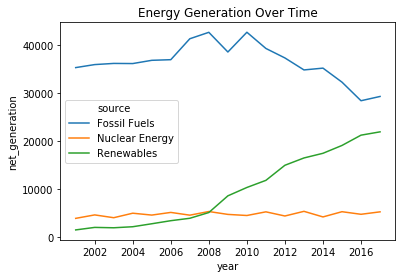

In [297]:
import seaborn as sns

sns.lineplot(x= iowa.index, y=iowa.net_generation, hue=iowa.source)
plt.title('Energy Generation Over Time')

- Display the data as table where years are columns, and energy source is rows (Hint: `df.pivot_table`)

In [302]:
iowa.pivot_table(index='source', columns='year')

net_generation                                              \
year               2001-01-01 2002-01-01 2003-01-01 2004-01-01 2005-01-01   
source                                                                      
Fossil Fuels            35361      35991      36234      36205      36883   
Nuclear Energy           3853       4574       3988       4929       4538   
Renewables               1437       1963       1885       2102       2724   

                                                                       \
year           2006-01-01 2007-01-01 2008-01-01 2009-01-01 2010-01-01   
source                                                                  
Fossil Fuels        37014      41389      42734      38620      42750   
Nuclear Energy       5095       4519       5282       4679       4451   
Renewables           3364       3870       5070       8560      10308   

                                                                       \
year           2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01   
source                                                                  
Fossil Fuels        39361      37379      34873      35250      32319   
Nuclear Energy       5215       4347       5321       4152       5243   
Renewables          11795      14949      16476      17452      19091   

                                      
year           2016-01-01 2017-01-01  
source                                
Fossil Fuels        28437      29329  
Nuclear Energy       4703       5214  
Renewables          21241      21933

- Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

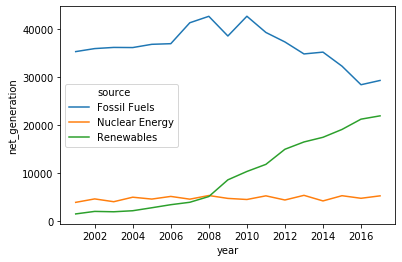

In [347]:
sns.lineplot(y=iowa.net_generation, x=iowa.index, hue=iowa.source)

- Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from each source?
    - express each number as a % of the year's total

---
## San Fransisco Temps

1. Use the `sf_temps` dataset

In [359]:
temps.head()

,temp,feel
date,,
2010-01-01 00:00:00,47.8,NaN
2010-01-01 01:00:00,47.4,NaN
2010-01-01 02:00:00,46.9,NaN
2010-01-01 03:00:00,46.5,NaN
2010-01-01 04:00:00,46.0,NaN


2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use `pd.cut` or `pd.qcut` for this)

In [369]:
temps['feel'] = pd.qcut(temps.temp.sort_values(), 4, labels=['cold', 'cool', 'warm', 'hot'])

3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

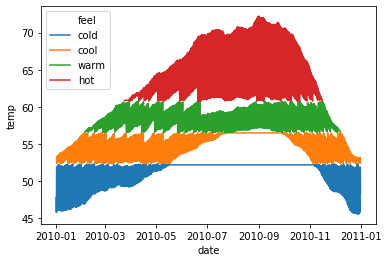

In [395]:
sns.lineplot(x=temps.index, y=temps.temp, hue=temps.feel)

4. Create pretty labels for time plots

5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

---
## Birdstrikes

In [418]:
url = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/birdstrikes.csv'
bird = pd.read_csv(url)

In [419]:
bird.head()

,Airport Name,Aircraft Make Model,Effect Amount of damage,Flight Date,Aircraft Airline Operator,Origin State,Phase of flight,Wildlife Size,Wildlife Species,Time of day,Cost Other,Cost Repair,Cost Total $,Speed IAS in knots
0,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,1990-01-08,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1990-01-09,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
2,BARKSDALE AIR FORCE BASE ARPT,B-52,None,1990-01-11,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
3,NEW ORLEANS INTL,B-737-300,Substantial,1990-01-11,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0
4,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1990-01-12,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,160.0


In [420]:
bird['Flight Date'] = pd.to_datetime(bird['Flight Date'])

In [421]:
bird.dtypes

Airport Name                         object
Aircraft Make Model                  object
Effect Amount of damage              object
Flight Date                  datetime64[ns]
Aircraft Airline Operator            object
Origin State                         object
Phase of flight                      object
Wildlife Size                        object
Wildlife Species                     object
Time of day                          object
Cost Other                            int64
Cost Repair                           int64
Cost Total $                          int64
Speed IAS in knots                  float64
dtype: object

In [422]:
bird = bird.set_index('Flight Date').sort_index()

In [423]:
bird.head()

,Airport Name,Aircraft Make Model,Effect Amount of damage,Aircraft Airline Operator,Origin State,Phase of flight,Wildlife Size,Wildlife Species,Time of day,Cost Other,Cost Repair,Cost Total $,Speed IAS in knots
Flight Date,,,,,,,,,,,,,
1990-01-08,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1990-01-09,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
1990-01-11,BARKSDALE AIR FORCE BASE ARPT,B-52,None,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
1990-01-11,NEW ORLEANS INTL,B-737-300,Substantial,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0
1990-01-12,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,160.0


Flight Date
1990-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
1991-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
1992-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
1993-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
1994-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
1995-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
1996-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
1997-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
1998-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
1999-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2000-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2001-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2002-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: A-DEC, Name: Speed IAS in knots, dtype: object

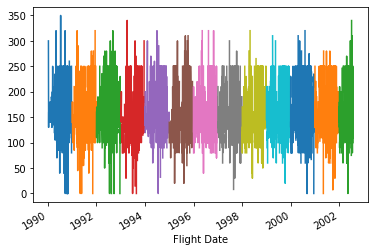

In [429]:
bird.resample('y')['Speed IAS in knots'].plot()